In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('Linear-data.csv')

In [3]:
import matplotlib.pyplot as plt

In [4]:
# Segregate into X and Y
X = data['6.1101']
Y = data['17.592']

In [5]:
X

0      5.5277
1      8.5186
2      7.0032
3      5.8598
4      8.3829
       ...   
91     5.8707
92     5.3054
93     8.2934
94    13.3940
95     5.4369
Name: 6.1101, Length: 96, dtype: float64

In [6]:
Y

0      9.13020
1     13.66200
2     11.85400
3      6.82330
4     11.88600
        ...   
91     7.20290
92     1.98690
93     0.14454
94     9.05510
95     0.61705
Name: 17.592, Length: 96, dtype: float64

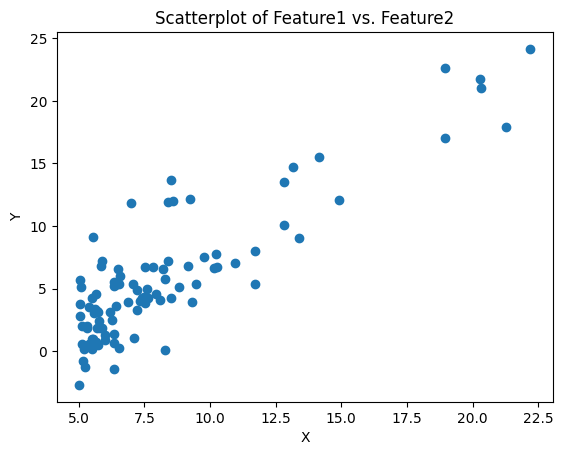

In [7]:
# Scatterplot for Feature1 vs. Feature2
plt.scatter(X, Y)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Scatterplot of Feature1 vs. Feature2')
plt.show()

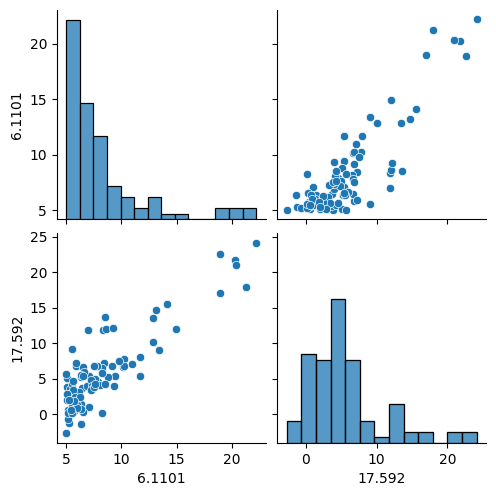

In [8]:
import seaborn as sns

# Create a pairplot
sns.pairplot(data)
plt.show()

In [9]:
import numpy as np
from scipy import stats

In [10]:
# Create a correlation matrix
correlation_matrix = data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
          6.1101    17.592
6.1101  1.000000  0.872157
17.592  0.872157  1.000000


In [11]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

print(f"Linear Regression Parameters:")
print(f"Slope (Regression Coefficient): {slope}")
print(f"Intercept: {intercept}")
print(f"R-squared (Coefficient of Determination): {r_value**2}")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

Linear Regression Parameters:
Slope (Regression Coefficient): 1.2135472539083587
Intercept: -4.211504005424093
R-squared (Coefficient of Determination): 0.7606583419339852
P-value: 6.110460481642768e-31
Standard Error: 0.07021131328791101


In [12]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# Compute the predicted values
predicted_Y = slope * X + intercept

# Compute the number of data points
n = len(X)

# Calculate the mean squared error (cost)
cost = np.mean((predicted_Y - Y) ** 2)

# Calculate the sum of squared errors (SSE)
sse = np.sum((predicted_Y - Y) ** 2)

# Calculate the sum of squared regression (SSR)
ssr = np.sum((predicted_Y - np.mean(Y)) ** 2)

# Calculate the sum of squared total (SST)
sst = np.sum((Y - np.mean(Y)) ** 2)

# Calculate the coefficient of determination (R-squared)
r_squared = 1 - (sse / sst)

print(f"Cost (Mean Squared Error): {cost}")
print(f"SSE (Sum of Squared Errors): {sse}")
print(f"SSR (Sum of Squared Regression): {ssr}")
print(f"SST (Sum of Squared Total): {sst}")
print(f"R-squared (Coefficient of Determination): {r_squared}")

Cost (Mean Squared Error): 6.91916380631601
SSE (Sum of Squared Errors): 664.2397254063369
SSR (Sum of Squared Regression): 2111.0386393116273
SST (Sum of Squared Total): 2775.2783647179626
R-squared (Coefficient of Determination): 0.7606583419339846


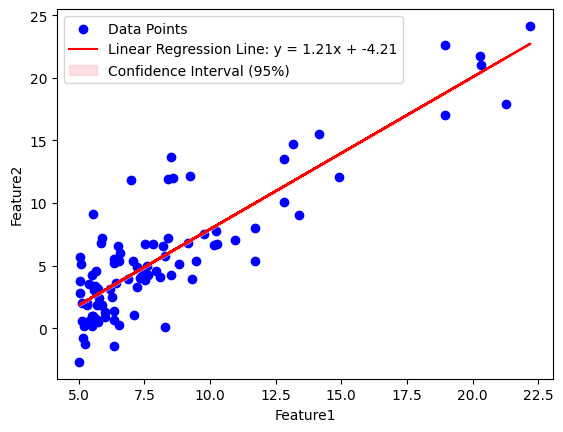

In [13]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X, Y)

# Calculate the predicted values based on the linear regression equation
predicted_Y = slope * X + intercept

# Plot the data points
plt.scatter(X, Y, label='Data Points', color='blue')

# Plot the linear regression line
plt.plot(X, predicted_Y, label=f'Linear Regression Line: y = {slope:.2f}x + {intercept:.2f}', color='red')

# Plot the confidence intervals
ci = stats.t.interval(0.95, len(X)-1, loc=np.mean(X), scale=stats.sem(X))
plt.fill_between(X, predicted_Y - std_err, predicted_Y + std_err, color='pink', alpha=0.5, label='Confidence Interval (95%)')

# Label the axes and add a legend
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.legend()

# Show the plot
plt.show()